In [128]:
%matplotlib inline
import matplotlib.pylab as plt
import joblib
import numpy as np
import itertools
import tqdm
import seaborn as sns

params = {
   'axes.labelsize': 8,
#   'text.fontsize': 8,
    'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
matplotlib.rcParams.update(params)
sns.set_context('paper')

In [44]:
# generated by scripts/CNN/tracklet_reid_descriptor_distance_matrix.py
matrices = joblib.load('/datagrid/ferda/results/180427_vaib/tracklet_distance_matrices.gz'))

In [46]:
matrices[0].keys()

['project_path', 'matrix', 'tracklets_prototypes']

In [127]:
def plot_id_borders(tracklets_and_prototypes, ax):
    id_borders = np.where(np.diff([tp[0].animal_id_ for tp in tracklets_and_prototypes]))[0] + 1
    num = len(tracklets_and_prototypes)
    for idx in id_borders:
        ax.vlines(idx, 0, num, linewidth=0.5, linestyles='dashed')
        ax.hlines(idx, 0, num, linewidth=0.5, linestyles='dashed')

        id_borders_ = np.concatenate(((0, ), id_borders, (num,)))
        id_borders_mid = (id_borders_[:-1] + id_borders_[1:]) / 2
#         ax.set_xticks(id_borders_mid)
#         ax.set_xticklabels(range(len(id_borders_mid)))
#         ax.set_yticks(id_borders_mid)
#         ax.set_yticklabels(range(len(id_borders_mid)))
        ax.set_xlabel('tracklet appearance')
        ax.set_ylabel('tracklet appearance')

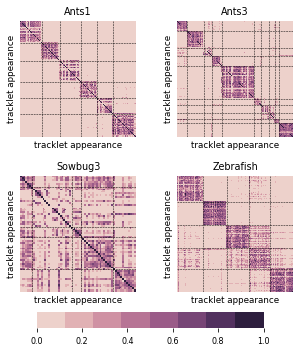

In [130]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches(15, 15)
fig.tight_layout()
fig.subplots_adjust(bottom=0.1)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # vertical colorbar
cbar_ax = fig.add_axes([0.15, 0, 0.7, 0.05])

titles = ['Ants1', 'Ants3', 'Sowbug3', 'Zebrafish']

for m, ax, t in zip(matrices, axes.flat, titles):
#     plt.figure(figsize=(15,15))
    # fig.suptitle(m['project_path'])
    ax.set_title(t)
    sns.heatmap(m['matrix'], cmap=sns.cubehelix_palette(8), ax=ax, square=True, xticklabels=False, yticklabels=False, 
                cbar_ax=cbar_ax, cbar_kws={'orientation': 'horizontal'})
    plot_id_borders(m['tracklets_prototypes'], ax)


In [131]:
fig.savefig('/home/matej/Private/Dropbox/shared/vaib18_extended_abstract/figures/descriptor_distance_matrix.png', dpi=300, bbox_inches='tight')